# Importing Libraries

In [85]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np

# Preprocessing Training Set

In [86]:
train_gen_data = ImageDataGenerator(rescale=1. / 255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
training_set = train_gen_data.flow_from_directory(r'C:\Users\VivoBook\training_set',
                                                  target_size=(64, 64), batch_size=32, class_mode='binary')

Found 8000 images belonging to 2 classes.


# Preprocessing Test Set

In [87]:
test_gen_data = ImageDataGenerator(rescale=1. / 255)
test_set = test_gen_data.flow_from_directory(r'C:\Users\VivoBook\test_set', target_size=(64, 64),
                                             batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.


# CNN

### Initialising CNN

In [88]:
cnn = tf.keras.models.Sequential()

### Convolutional

In [89]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Pooling

In [90]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size= 2, strides= 2))

### Second convolutional layer

In [91]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size= 2, strides= 2))

### Flattening

In [92]:
cnn.add(tf.keras.layers.Flatten())

### Full Connection

In [93]:
cnn.add(tf.keras.layers.Dense(units= 128, activation= 'relu'))

### Output Layer

In [94]:
cnn.add(tf.keras.layers.Dense(units= 1, activation= 'sigmoid'))

# Training CNN

### Compiling CNN

In [95]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Traning set and Evaluting it on Test set

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 50s 198ms/step - loss: 0.6767 - accuracy: 0.5810 - val_loss: 0.6809 - val_accuracy: 0.5905
Epoch 2/25
250/250 [==============================] - 46s 186ms/step - loss: 0.6134 - accuracy: 0.6639 - val_loss: 0.5767 - val_accuracy: 0.6950
Epoch 3/25
250/250 [==============================] - 48s 192ms/step - loss: 0.5667 - accuracy: 0.7026 - val_loss: 0.5586 - val_accuracy: 0.7080
Epoch 4/25
250/250 [==============================] - 42s 168ms/step - loss: 0.5336 - accuracy: 0.7341 - val_loss: 0.5297 - val_accuracy: 0.7425
Epoch 5/25
250/250 [==============================] - 42s 168ms/step - loss: 0.5123 - accuracy: 0.7486 - val_loss: 0.5060 - val_accuracy: 0.7500
Epoch 6/25
250/250 [==============================] - 42s 167ms/step - loss: 0.4966 - accuracy: 0.7552 - val_loss: 0.5407 - val_accuracy: 0.7215
Epoch 7/25
250/250 [==============================] - 45s 179ms/step - loss: 0.4816 - accuracy: 0.7610 - val_loss: 0.4738 - val_ac

# Making Prediction

1/1 [==============================] - 0s 105ms/step


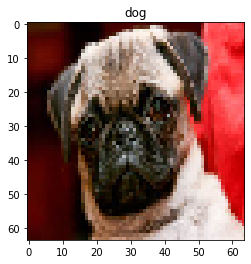

In [96]:
import matplotlib.pyplot as plt

# Load and preprocess the test image
test_image = image.load_img(r"C:\Users\VivoBook\single_prediction\lol.jpeg", target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Make prediction using the trained CNN model
result = cnn.predict(test_image)

# Get the predicted class label
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

# Show the test image with predicted label
plt.imshow(test_image[0]/255.)
plt.title(prediction)
plt.show()

        

In [97]:
prediction


'dog'